In [1]:
import cv2
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
import os

In [2]:
# 클래스 균형 확인 코드
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def check_class_balance(class_target_list):
    cate = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

    for train_labels in tqdm(class_target_list): # 1 txt file
        with open(train_labels, 'r', encoding='utf-8') as f:
            label = f.readlines() # 1 txt file labels
            for lab in label: # 1 line, in 1 txt file
                lab = lab.split(' ')
                cls = int(lab[0])

                if cls == 0:
                    cate[0] += 1
                elif cls == 1:
                    cate[1] += 1
                elif cls == 2:
                    cate[2] += 1
                elif cls == 3:
                    cate[3] += 1
                elif cls == 4:
                    cate[4] += 1
                elif cls == 5:
                    cate[5] += 1
                elif cls == 6:
                    cate[6] += 1
                elif cls == 7:
                    cate[7] += 1
                elif cls == 8:
                    cate[8] += 1
                elif cls == 9:
                    cate[9] += 1
                elif cls == 10:
                    cate[10] += 1
                elif cls == 11:
                    cate[11] += 1
                elif cls == 12:
                    cate[12] += 1
                elif cls == 13:
                    cate[13] += 1 

    result_cate = cate
    print(result_cate)

    X = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    Y = np.array(result_cate)

    ax = sns.barplot(X,Y, order=X)
    for p, q in zip(ax.patches, Y):
        ax.text(p.get_x()+p.get_width()/2.,
            p.get_height()*(1.01),
            "{}".format(q),
            ha = 'center'  )

    plt.show()

In [3]:
def yolobbox2bbox(x, y, w, h, w_t, h_t):
    x1, y1 = (x - (w / 2.0)) * w_t, (y - (h / 2.0)) * h_t
    x2, y2 = (x + (w / 2.0)) * w_t, (y + (h / 2.0)) * h_t
    x1 = round(x1, 1)
    y1 = round(y1, 1)
    x2 = round(x2, 1)
    y2 = round(y2, 1)
    
    return (x1, y1, x2, y2)

def bbox2yolobbox(x1, y1, x2, y2, w_t, h_t):
    x = round((x2 + x1) / (2 * w_t), 6)
    y = round((y2 + y1) / (2 * h_t), 6)
    w = round((x2 - x1) / w_t, 6)
    h = round((y2 - y1) / h_t, 6)
    
    return (x, y, w, h)

In [4]:
%cd yolor

C:\Users\user\Desktop\jh\yolor


In [5]:
from glob import glob

all_train_label_list = glob("../dataset/train-001-aug/labels/*.txt")

print(len(all_train_label_list))

38696


In [6]:
from tqdm import tqdm

def find_class_images(target_class, all_train_label_list):
    target_class = target_class
    num_class_target = 0
    class_target_list = []

    for train_labels in tqdm(all_train_label_list): # 1 txt file
        with open(train_labels, 'r', encoding='utf-8') as f:
            label = f.readlines() # 1 txt file labels
            for lab in label: # 1 line, in 1 txt file
                lab = lab.split(' ')
                cls, x, y, w, h = int(lab[0]), float(lab[1]), float(lab[2]), float(lab[3]), float(lab[4])

                if cls == target_class:
                    num_class_target += 1

                    class_target_list.append(train_labels)

    print("Class Num:", num_class_target)
    print("Image Num:", len(set(class_target_list)))
    
    return class_target_list

100%|███████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 10026.81it/s]

[151, 65, 49, 0, 0, 0, 0, 117, 6, 0, 0, 0, 64, 6]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


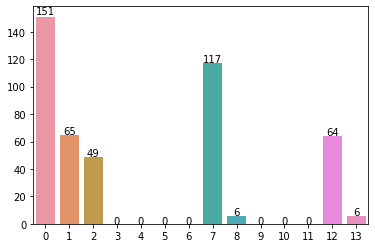

In [365]:
# Class 12
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

100%|█████████████████████████████████████████████████████████████████████████████| 129/129 [00:00<00:00, 26325.36it/s]

[249, 168, 26, 33, 0, 23, 0, 146, 0, 170, 356, 0, 0, 0]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


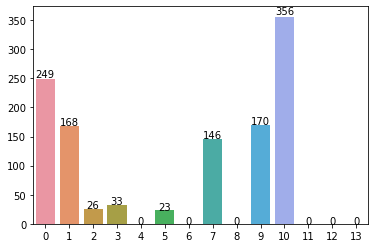

In [367]:
# Class 10
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

100%|█████████████████████████████████████████████████████████████████████████████| 454/454 [00:00<00:00, 10962.34it/s]

[1217, 635, 91, 3, 2, 52, 7, 802, 496, 15, 0, 0, 6, 190]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


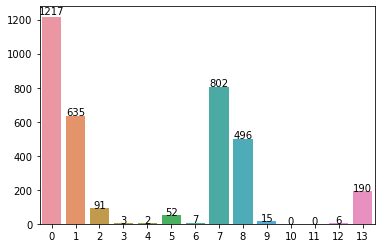

In [369]:
# Class 8
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

100%|█████████████████████████████████████████████████████████████████████████████| 412/412 [00:00<00:00, 10000.83it/s]

[1288, 738, 50, 902, 6, 26, 8, 411, 3, 63, 32, 11, 0, 1]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


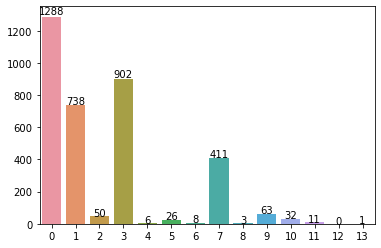

In [371]:
# Class 3
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

100%|███████████████████████████████████████████████████████████████████████████| 1104/1104 [00:00<00:00, 16126.99it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[2895, 1100, 157, 7, 1140, 175, 21, 136, 3, 10, 0, 0, 0, 23]


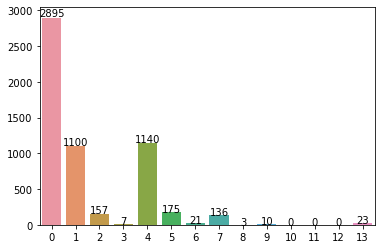

In [373]:
# Class 4
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

100%|███████████████████████████████████████████████████████████████████████████| 1431/1431 [00:00<00:00, 13999.34it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[3165, 1380, 334, 6, 20, 333, 1564, 187, 10, 9, 0, 37, 0, 7]


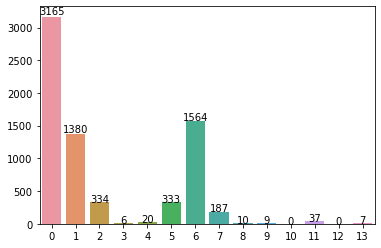

In [375]:
# Class 6
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

100%|███████████████████████████████████████████████████████████████████████████| 2244/2244 [00:00<00:00, 20227.89it/s]

[5232, 2383, 290, 126, 5, 443, 12, 493, 9, 2674, 311, 167, 0, 71]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


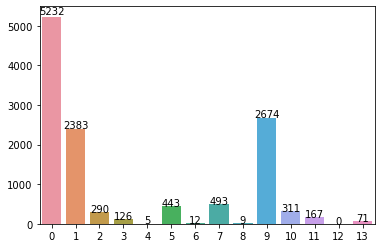

In [377]:
# Class 9
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

100%|███████████████████████████████████████████████████████████████████████████| 1424/1424 [00:00<00:00, 14200.17it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[3001, 1278, 320, 54, 0, 195, 26, 357, 0, 74, 0, 2966, 0, 27]


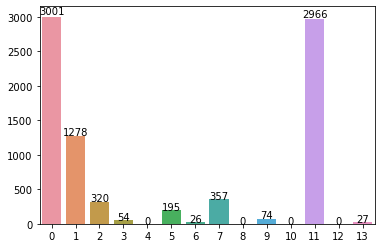

In [379]:
# Class 11
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

100%|███████████████████████████████████████████████████████████████████████████| 3156/3156 [00:00<00:00, 15786.85it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[6625, 3331, 619, 33, 148, 3545, 336, 2770, 47, 488, 40, 310, 0, 742]


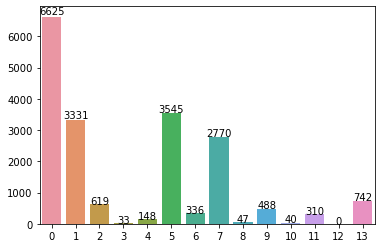

In [381]:
# Class 5
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

100%|███████████████████████████████████████████████████████████████████████████| 4068/4068 [00:00<00:00, 15928.44it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[11002, 4854, 4581, 68, 150, 642, 355, 3381, 87, 337, 51, 558, 47, 1360]


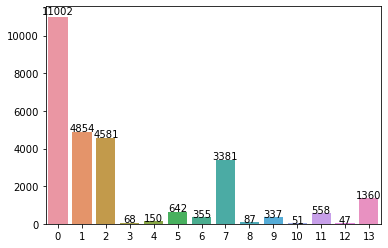

In [386]:
# Class 2
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

100%|███████████████████████████████████████████████████████████████████████████| 7687/7687 [00:00<00:00, 19320.39it/s]

[15913, 7235, 1243, 2, 21, 702, 7, 3478, 159, 68, 0, 28, 3, 8997]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


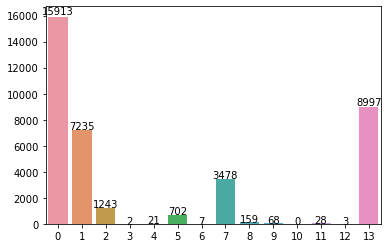

In [388]:
# Class 13
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

100%|█████████████████████████████████████████████████████████████████████████| 13597/13597 [00:00<00:00, 19008.81it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[34434, 17895, 2772, 770, 112, 2169, 150, 20747, 444, 460, 235, 472, 59, 2513]


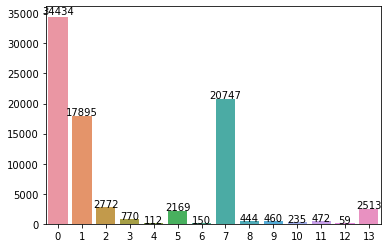

In [390]:
# Class 7
class_target_set = set(class_target_list)
check_class_balance(class_target_set)

# Image Augmentation

In [9]:
# Total Code
def aug_images(img_path, txt_path, output_img_path, output_txt_path):
    img_array = np.fromfile(img_path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    input_img = img[np.newaxis, :, :, :]

    txts = np.loadtxt(txt_path, dtype = str, delimiter = ' ').astype(float)
    if txts.ndim == 1:
        txts = txts[np.newaxis, :]
    
    labels = []
    for i, txt in enumerate(txts):
        x1, y1, x2, y2 = yolobbox2bbox(txt[1], txt[2], txt[3], txt[4], 1920, 1080)
        input_label = [int(txt[0]), x1, y1, x2, y2]
        labels.append(input_label)
    
    bbox = []
    for label in labels:
        bbox.append(ia.BoundingBox(x1 = label[1], y1 = label[2], x2 = label[3], y2 = label[4], label = label[0]))
        
#     bbox = [
#             ia.BoundingBox(x1 = labels[0][1], y1 = labels[0][2], x2 = labels[0][3], y2 = labels[0][4], label = int(labels[0][0])),
#             ia.BoundingBox(x1 = labels[1][1], y1 = labels[1][2], x2 = labels[1][3], y2 = labels[1][4], label = int(labels[1][0])),
#             ia.BoundingBox(x1 = labels[2][1], y1 = labels[2][2], x2 = labels[2][3], y2 = labels[2][4], label = int(labels[2][0])),
#             ia.BoundingBox(x1 = labels[3][1], y1 = labels[3][2], x2 = labels[3][3], y2 = labels[3][4], label = int(labels[3][0]))
#         ]

    seq = iaa.Sequential([
        iaa.Affine(
            scale={"x": (0.5, 0.7), "y": (0.5, 0.7)},
            rotate = (-15, 15)
        ),
        iaa.AdditiveGaussianNoise(scale = (0.05*255, 0.10*255)),
        iaa.GaussianBlur((0, 1.0)),
        iaa.PerspectiveTransform(scale=(0.01, 0.02))
    ])

    output_img, output_bbox = seq(images = input_img, bounding_boxes = bbox)
    output_img = np.squeeze(output_img, axis=0)

    result, encoded_img = cv2.imencode('.png', output_img)
    
    if result:
        with open(output_img_path, mode='w+b') as f:
            encoded_img.tofile(f)

    with open(output_txt_path, 'w', encoding='utf-8') as f:
        for bbox in output_bbox:
            x, y, w, h = bbox2yolobbox(bbox.x1, bbox.y1, bbox.x2, bbox.y2, 1920, 1080)

            line = str(bbox.label) + ' ' + str(x) + ' ' + str(y) + ' ' + str(w) + ' ' + str(h) + '\n'
            f.write(line)

In [ ]:
train_label_list = glob("../dataset/train-001-aug/labels/*.txt")

class12_target_list = find_class_images(12, train_label_list)
class10_target_list = find_class_images(10, train_label_list)
class08_target_list = find_class_images(8, train_label_list)
class03_target_list = find_class_images(3, train_label_list)
class06_target_list = find_class_images(6, train_label_list)
class02_target_list = find_class_images(2, train_label_list)

In [13]:
# Class 12(x 50), 10(x 10), 8(x 10), 3(x 5), 6(x 2), 2(x 2)
class12_target_set = set(class12_target_list)
class10_target_set = set(class10_target_list)
class08_target_set = set(class08_target_list)
class03_target_set = set(class03_target_list)
class06_target_set = set(class06_target_list)
class02_target_set = set(class02_target_list)

In [ ]:
for i in tqdm(range(50)):
    for path in class12_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")

for i in tqdm(range(10)):
    for path in class10_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")

for i in tqdm(range(10)):
    for path in class08_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")
        
for i in tqdm(range(5)):
    for path in class03_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")
        
for i in tqdm(range(2)):
    for path in class06_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")
        
for i in tqdm(range(2)):
    for path in class02_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████| 24650/24650 [00:40<00:00, 605.45it/s]

[58536, 28173, 4581, 902, 1140, 3545, 1564, 20747, 496, 2674, 356, 2966, 64, 8997]



C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


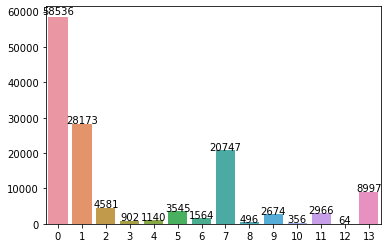

In [13]:
from glob import glob

all_train_label_list = glob("../dataset/train-001/labels/*.txt")
check_class_balance(all_train_label_list)

100%|███████████████████████████████████████████████████████████████████████████| 38696/38696 [01:22<00:00, 466.32it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[95111, 46440, 9905, 5592, 1260, 5179, 4772, 38960, 5696, 4827, 3916, 3207, 3264, 11470]


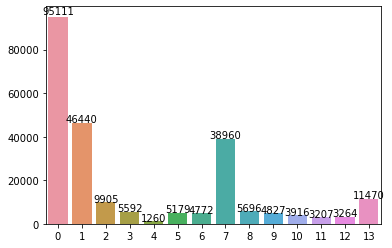

In [14]:
from glob import glob

all_train_label_list = glob("../dataset/train-001-aug/labels/*.txt")
check_class_balance(all_train_label_list)

# train-001-aug2

In [15]:
train_label_list = glob("../dataset/train-001-aug2/labels/*.txt")

class12_target_list = find_class_images(12, train_label_list)
class10_target_list = find_class_images(10, train_label_list)
class08_target_list = find_class_images(8, train_label_list)
class03_target_list = find_class_images(3, train_label_list)
class06_target_list = find_class_images(6, train_label_list)
class02_target_list = find_class_images(2, train_label_list)

class04_target_list = find_class_images(4, train_label_list)
class05_target_list = find_class_images(5, train_label_list)
class09_target_list = find_class_images(9, train_label_list)
class11_target_list = find_class_images(11, train_label_list)

100%|█████████████████████████████████████████████████████████████████████████| 24650/24650 [00:01<00:00, 23287.87it/s]


Class Num: 64
Image Num: 55


100%|█████████████████████████████████████████████████████████████████████████| 24650/24650 [00:01<00:00, 23644.13it/s]


Class Num: 356
Image Num: 129


100%|█████████████████████████████████████████████████████████████████████████| 24650/24650 [00:00<00:00, 28519.16it/s]


Class Num: 496
Image Num: 454


100%|█████████████████████████████████████████████████████████████████████████| 24650/24650 [00:01<00:00, 24500.31it/s]


Class Num: 902
Image Num: 412


100%|█████████████████████████████████████████████████████████████████████████| 24650/24650 [00:01<00:00, 22214.57it/s]


Class Num: 1564
Image Num: 1431


100%|█████████████████████████████████████████████████████████████████████████| 24650/24650 [00:00<00:00, 26511.24it/s]


Class Num: 4581
Image Num: 4068


100%|█████████████████████████████████████████████████████████████████████████| 24650/24650 [00:01<00:00, 24543.86it/s]


Class Num: 1140
Image Num: 1104


100%|█████████████████████████████████████████████████████████████████████████| 24650/24650 [00:01<00:00, 20864.50it/s]


Class Num: 3545
Image Num: 3156


100%|█████████████████████████████████████████████████████████████████████████| 24650/24650 [00:01<00:00, 21694.22it/s]


Class Num: 2674
Image Num: 2244


100%|█████████████████████████████████████████████████████████████████████████| 24650/24650 [00:00<00:00, 26353.76it/s]

Class Num: 2966
Image Num: 1424


In [16]:
class12_target_set = set(class12_target_list)
class10_target_set = set(class10_target_list)
class08_target_set = set(class08_target_list)
class03_target_set = set(class03_target_list)
class06_target_set = set(class06_target_list)
class02_target_set = set(class02_target_list)

class04_target_set = set(class04_target_list)
class05_target_set = set(class05_target_list)
class09_target_set = set(class09_target_list)
class11_target_set = set(class11_target_list)

In [17]:
# train-001-aug2
# Class 12(x 50), 10(x 10), 8(x 10), 3(x 5), 6(x 2), 2(x 2) + 4(x 2), 5(x 2), 9(x 2), 11(x 2)
for i in tqdm(range(50)):
    for path in class12_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")

for i in tqdm(range(10)):
    for path in class10_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")

for i in tqdm(range(10)):
    for path in class08_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")
        
for i in tqdm(range(5)):
    for path in class03_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")
        
for i in tqdm(range(2)):
    for path in class06_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")
        
for i in tqdm(range(2)):
    for path in class02_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")

for i in tqdm(range(2)):
    for path in class04_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")
for i in tqdm(range(2)):
    for path in class05_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")
for i in tqdm(range(2)):
    for path in class09_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")
for i in tqdm(range(2)):
    for path in class11_target_set:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [14:55<00:00, 447.96s/it]


100%|███████████████████████████████████████████████████████████████████████████| 56132/56132 [03:16<00:00, 286.36it/s]
C:\Users\user\anaconda3\envs\yolor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[137467, 65395, 17141, 5592, 3454, 11310, 4772, 50034, 5696, 9631, 3916, 8931, 3264, 15232]


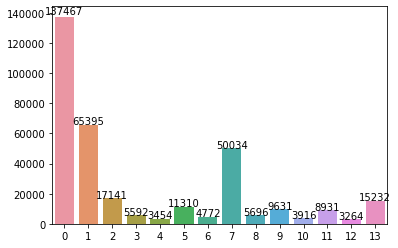

In [19]:
from glob import glob

all_train_label_list = glob("../dataset/train-001-aug2/labels/*.txt")
check_class_balance(all_train_label_list)

In [21]:
sample_train_label_list = glob("../dataset/train-sample/labels/*.txt")
sample_train_label_list

['../dataset/train-sample/labels\\20201102_경기도_-_-_맑음_주간_실외_right_000004_0069936.txt']

In [36]:
ia.seed(42)

for i in tqdm(range(5)):
    for path in sample_train_label_list:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.04it/s]


In [37]:
ia.seed(42)

for i in tqdm(range(5)):
    for path in sample_train_label_list:
        txt_path = path
        img_path = path.replace("labels", "images").replace("txt", "png")

        aug_images(img_path, txt_path, img_path[:-4] + "_aug" + str(i) + ".png", txt_path[:-4] + "_aug" + str(i) + ".txt")

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.03it/s]


In [49]:
!python augmentation-copy.py

finished!



100%|##########| 5/5 [00:00<00:00,  5.05it/s]


In [ ]:
0 0.51309 0.161705 0.200115 0.144197
0 0.769045 0.245409 0.051148 0.049629
1 0.811687 0.289319 0.061916 0.091732
7 0.274503 0.089213 0.015645 0.049167